# Degree Distribution (in-degree)
how many articles directly link to a particular article?

In [1]:
from collections import defaultdict

import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = "/Users/mark/Dropbox/Math/Complex_Systems/research/wikipedia-network/paper/writeup/graphics/"
results_path = "/Users/mark/Desktop/wiki_v4/"


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#load ndegree data

with open(results_path + 'direct_links.json', 'r') as fp:
    direct_links = json.load(fp)

dldf = pd.DataFrame(direct_links.items())
dldf.columns = ['article', 'direct links']

#add ndegree dataframe column
l = lambda x: len(x)
dldf['indegree'] = dldf['direct links'].map(l)

In [3]:
dldf

,article,direct links,indegree
0,Software release life cycle#Release,"[Going gold, Gone Gold, Gold (software), Gold ...",5
1,bolt action rifle,"[Remington Model 673, Alejandro Sniper Rifle, ...",3
2,Pig (1998 film),[Nico B.],1
3,Saturn I#S-I_stage,[S-I],1
4,Anniston Museum of Natural History,[Anniston museum of natural history],1
5,Bitiče,[Bitice],1
6,AEF Monotrace,"[AEF Air Lift System Monotrace, Monotrace]",2
7,Xel-Ha Park,"[Xel Ha Park, Xel-Há Park, Xel-Há Eco Park, Xe...",8
8,Canton of Chalamont,[Canton of chalamont],1
9,Diocese of Nidaros,"[Diocese of nidaros, Bishop of Nidaros]",2


## What are the highest ranking articles by indegree?
indegree: number of direct first links to an article

In [3]:
dldf_sorted = dldf.sort(columns='indegree', ascending=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [6]:
dldf_sorted

,article,direct links,indegree
2383074,United States,"[Death of a Soldier, Newton D. Baker, Six Degr...",80249
1404177,village,"[Crnoklište, Tiruvali, Gola, Krosno Odrzańskie...",68526
1113168,moth,"[Nemapogon alticolella, Iconostigma morosa, Eo...",52007
2334701,Communes of France,"[Champanges, Régat, Mauzac, Haute-Garonne, Mau...",35940
1617818,species,"[Orania purpurea, Pedicularia vanderlandi, Mit...",29251
750292,genus,"[Hyposada, Semidelitschia, Amoebites, Malva, F...",26603
203610,Canada,"[Irving Meretsky, Montgomery Steele, Marilyn L...",22064
2166394,American football,"[Chuck Bernard, Milo Sukup, Roynell Young, Cha...",21549
3066124,association football,"[Jimmy O'Neill (footballer born 1941), Alf Tin...",18948
2349366,United Kingdom,"[Landing ship, infantry, Belief (album), Bette...",18539


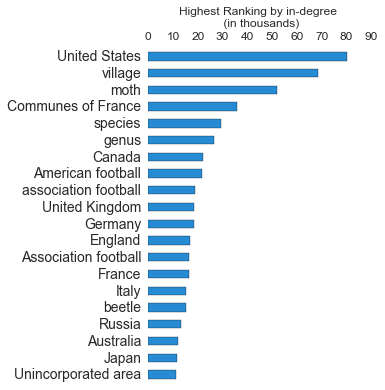

In [8]:
dldf_sorted['indegree (k)'] = dldf_sorted['indegree'] / 1000
dldf_sorted.head(20).iloc[::-1].plot(x="article", y="indegree (k)", kind="barh", fontsize=14,
                            legend=False, figsize=(4,6), color="#268bd2")
#no background
ax = plt.gca()
ax.patch.set_visible(False) 


plt.xlabel("Highest Ranking by in-degree \n (in thousands)", fontsize=12)
plt.ylabel("")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.tick_params(axis='x', which='major', labelsize=12)

#save figure
plt.savefig(path+'articles_ndegree.png', format='png', dpi=300, bbox_inches='tight')

## How many articles link to Philosophy?

In [11]:
dldf[dldf['article'] == "philosophy"]

,article,direct links,indegree
1992476,philosophy,"[1536 in philosophy, Theophysics, Lorenzo Peña...",581


## Which articles link to Philosophy?

In [13]:
phil_links = list(dldf[dldf['article'] == "philosophy"]["direct links"])
phil_links

[[u'1536 in philosophy',
  u'Theophysics',
  u'Lorenzo Pe\xf1a',
  u'Draft:Data as code',
  u'Cogito (magazine)',
  u'Indeterminacy (philosophy)',
  u'List of philosophy categories',
  u'Philosophy of geography',
  u'Randal Marlin',
  u'David C. Lane',
  u'On Certainty',
  u'Essence',
  u'Hassan Hanafi',
  u'Nade\u017eda \u010ca\u010dinovi\u010d',
  u'Absurdism',
  u'Immutable truth',
  u'John Alexander Gunn',
  u'Existentialism and Humanism',
  u'Jesuism',
  u'Kierkegaard Society of the UK',
  u'Underworld of philosophy',
  u'African philosophy',
  u'Antinatalism',
  u'Active citizenship',
  u"Philosophers' Imprint",
  u'1926 in philosophy',
  u'Transmodernity',
  u'Environmental hermeneutics',
  u'Evolutionary Enlightenment',
  u'Pancasila (politics)',
  u'Herbert Marcuse',
  u'Event (philosophy)',
  u'Paul Taylor (philosopher)',
  u'International Kierkegaard Society',
  u'Good faith',
  u'Deflationary theory of truth',
  u'Aporia',
  u'Franz Brentano',
  u'Totality and Infinity',
  

# indegree distribution

In [37]:
dldf.describe()

,ndegree
count,3104793.000000
mean,3.632298
std,89.540298
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,80249.000000


###note the distribution excludes articles without any direct links 
~7.9 million articles have 0 indegree  (~80% of all articles)

## How many articles with > 100 indegree?

In [13]:
dldf[dldf['indegree'] > 100]['indegree'].count()

4826

## What's the distribution of the top ndegree quartile?

In [14]:
dldf[dldf['indegree'] > 3].describe()

,indegree
count,568638.000000
mean,13.289071
std,208.948619
min,4.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,80249.000000


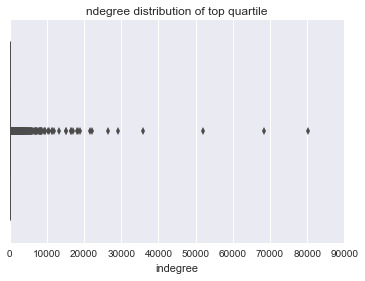

In [16]:
sns.boxplot(x='indegree', data=dldf[dldf['indegree'] > 3])
plt.title("ndegree distribution of top quartile")

# ndegree on log-log scale

In [4]:
dldf_sorted['rank'] = np.arange(1, dldf_sorted.shape[0]+1)
dldf_sorted['log(rank)'] = np.log10(dldf_sorted['rank'])
dldf_sorted['log(indegree)']=  np.log10(dldf_sorted['indegree'])

### highest ranking sample

[]

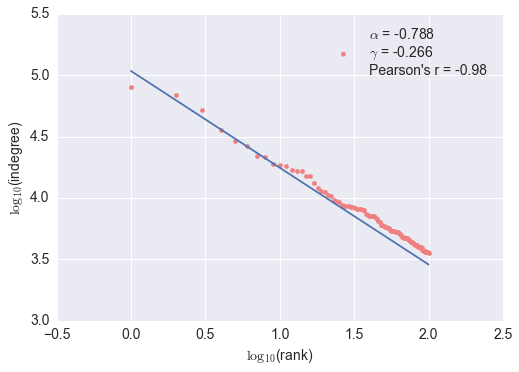

In [5]:
plt.scatter(dldf_sorted['log(rank)'][:100], dldf_sorted['log(indegree)'][:100], color="#F08080", 
            label=r'$\alpha$ = -0.788'+"\n$\gamma$ = -0.266"+"\nPearson\'s r = -0.98 ")
plt.xlabel("$\log_{10}$(rank)", fontsize=14)
plt.ylabel("$\log_{10}$(indegree)", fontsize=14)
#make axis font size larger
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)

plt.plot(range(0, 3), [x*-0.7882627 + 5.034976 for x in range(0, 3)])
plt.plot()

**note:** model above is the best fit for the entire dataset

### full dataset

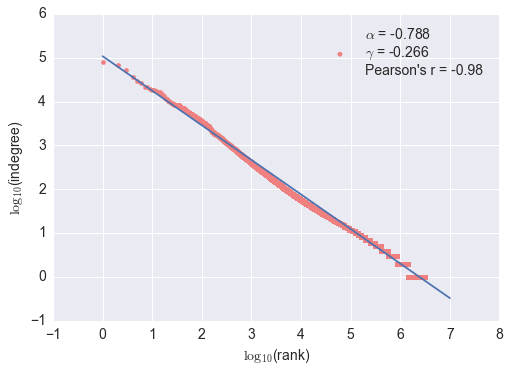

In [6]:
plt.scatter(dldf_sorted['log(rank)'], dldf_sorted['log(indegree)'], color="#F08080",
                        label=r'$\alpha$ = -0.788'+"\n$\gamma$ = -0.266"+"\nPearson\'s r = -0.98 ")
plt.xlabel("$\log_{10}$(rank)", fontsize=14)
plt.ylabel("$\log_{10}$(indegree)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14) #axis font size
plt.legend(fontsize=14)

plt.plot(range(0, 8), [x*-0.7882627 + 5.034976 for x in range(0, 8)])

#save figure
plt.savefig(path+'ndegree_loglog.png', format='png', dpi=300, bbox_inches='tight')

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dldf_sorted["log(rank)"], dldf_sorted["log(indegree)"])
print slope, intercept, r_value, p_value, std_err 

-0.788262734511 5.03497683312 -0.978552362215 0.0 9.41747005457e-05


### Power-Law Rank Exponent of -0.7883

In [ ]:
# ONE TIME TO GENERATE N-degree

#load first link network 
    # runtime < 30min
results_path = "/Users/mark/Desktop/wiki_v4/"
with open(results_path + "fln.json") as f:
    fln = json.load(f)
fldf = pd.DataFrame(fln.items())
fldf.columns = ['article', 'first link']

#reverse hash of direct_links
direct_links = defaultdict(list)

for article, first_link in fln.iteritems():
    direct_links[first_link].append(article)
    
with open(results_path + 'direct_links.json', 'w') as fp:
    json.dump(direct_links, fp)

dldf = pd.DataFrame(direct_links.items())
dldf.columns = ['article', 'direct links']

#add ndegree dataframe column
l = lambda x: len(x)
dldf['ndegree'] = dldf['direct links'].map(l)